# Homework 3
## Exercise 2 - Simulate a pandemic without vaccination
Pierluigi Compagnone 

In [7]:
import numpy as np 
import matplotlib.pyplot as plt 
import networkx as nx 
from utility import *

### Problem 2 
Using the methods developed in Section 1, generate a preferential attachment random graph $G = (V, E)$, with $|V| = 500$ nodes. The average degree should be $k = 6$. 

In [8]:
k = 6
n_nodes = 500

# Starting point Graph 
G = nx.generators.classic.complete_graph(k + 1)

# Preferential attachement
for nt in range(k+1, n_nodes):
    
    w = np.array(G.degree)[:,1]
    prob = w / np.sum(w) 
    c = (k + (nt % 2)) // 2

    idx = np.random.choice(G.nodes(), size =c, replace=False, p =prob)
    G.add_node(nt)
    
    for link in range(c):
        G.add_edge( nt, idx[link]) 

print("Average degree:",np.mean(np.array(G.degree)[:,1]))

Average degree: 6.0


Let $β = 0.3$ and $ρ = 0.7$. With one week being one unit of time, simulate the epidemic for $15$ weeks. You can choose an initial configuration with $10$ infected nodes selected at random from the node set $V$, or make a different choice of initial configuration (in the latter case, please briefly discuss your motivation).

In [9]:
# Initialization
beta = 0.3
ro = 0.7
n_steps = 100
n_weeks = 15
initial_infected = 10
n_stati = 3
policy = "random"

simu= np.zeros([n_steps,n_weeks, n_nodes])

# Simulation loop
for _ in range(0,n_steps):
    print("# Simulation ",_)
    
    states = np.zeros([n_weeks, n_nodes])
    
    # Initial condition 
    x0 = set_init_config(G, initial_infected, policy)
    states[0] = x0
    
    # Single simulation loop
    for i in range(1,n_weeks):        
        # Take last configuration
        x = np.copy( states[i-1] )        
        rates = new_conf_rates(G, x, beta, ro, n_stati)
        
        # Chose the next configuration 
        next_pos = np.argmax(np.cumsum(rates,axis=1) > np.random.rand(n_nodes,1), axis=1)
        states[i] = next_pos
        
    simu[_] = states

# Simulation  0
# Simulation  1
# Simulation  2
# Simulation  3
# Simulation  4
# Simulation  5
# Simulation  6
# Simulation  7
# Simulation  8
# Simulation  9
# Simulation  10
# Simulation  11
# Simulation  12
# Simulation  13
# Simulation  14
# Simulation  15
# Simulation  16
# Simulation  17
# Simulation  18
# Simulation  19
# Simulation  20
# Simulation  21
# Simulation  22
# Simulation  23
# Simulation  24
# Simulation  25
# Simulation  26
# Simulation  27
# Simulation  28
# Simulation  29
# Simulation  30
# Simulation  31
# Simulation  32
# Simulation  33
# Simulation  34
# Simulation  35
# Simulation  36
# Simulation  37
# Simulation  38
# Simulation  39
# Simulation  40
# Simulation  41
# Simulation  42
# Simulation  43
# Simulation  44
# Simulation  45
# Simulation  46
# Simulation  47
# Simulation  48
# Simulation  49
# Simulation  50
# Simulation  51
# Simulation  52
# Simulation  53
# Simulation  54
# Simulation  55
# Simulation  56
# Simulation  57
# Simulation  58
# Simul

In [10]:
# To visulize the pandemic evolution over the weeks 
# (Just for small graphs)
#graph_evolution(G, states, n_stati)

- The average number of newly infected individuals each week. In other words, you should plot how many individuals become infected each week.

Average new infected per week: [9.920e+00 1.657e+01 5.255e+01 9.853e+01 1.051e+02 6.807e+01 3.407e+01
 1.379e+01 5.950e+00 2.570e+00 1.150e+00 4.200e-01 1.900e-01 7.000e-02
 5.000e-02]



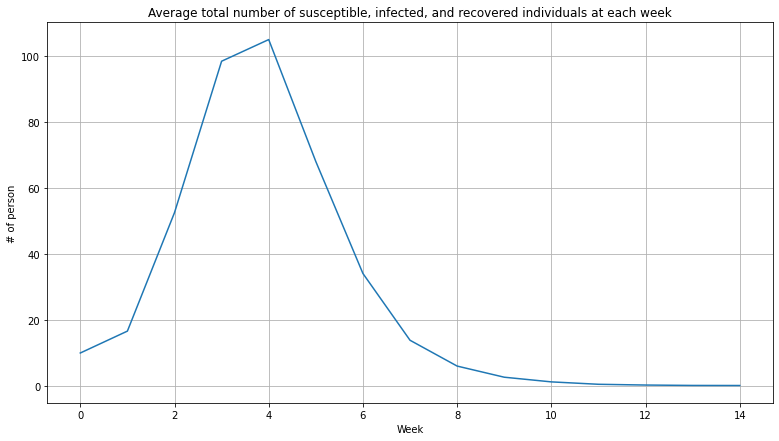

In [11]:
# Compute the average new infected
simu_week_i = np.zeros([n_steps, n_weeks])

for i in range( simu.shape[0] ):     
    simu_week_i[i] =  new_weekly( simu[i], 1 ) 
    
avg_week_i = np.mean(simu_week_i ,axis=0)

print("Average new infected per week: {}\n".format(avg_week_i))

# Plot the average new infected per week
plt.figure(figsize = (13 ,7))
plt.plot(range(n_weeks), avg_week_i) 
plt.xlabel("Week")
plt.ylabel("# of person")
plt.title("Average total number of susceptible, infected, and recovered individuals at each week")
plt.grid()
#plt.savefig("./images/Ex2_1_{}.png".format(policy) )
plt.show()

- The average total number of susceptible, infected, and recovered individuals at each week. In other words, you should plot how many individuals in total that are suscep- tible/infected/recovered at each week.

Average susceptible per week: [490.08 473.51 420.96 322.43 217.33 149.26 115.19 101.4   95.45  92.88
  91.73  91.31  91.12  91.05  91.  ]
Average infected per week: [  9.92  19.26  58.22 116.19 139.07 110.09  66.7   33.69  15.94   7.24
   3.46   1.39   0.69   0.3    0.15]
Average recovered per week: [  0.     7.23  20.82  61.38 143.6  240.65 318.11 364.91 388.61 399.88
 404.81 407.3  408.19 408.65 408.85]


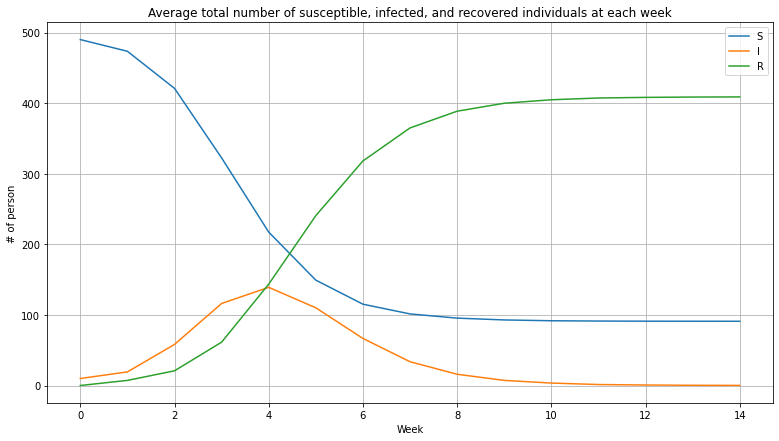

In [12]:
# Compute the average number per state {S,I,R} 
sum_sir = np.zeros([n_weeks, n_stati])

for s in simu :
    sum_sir  += count_SIR(s, n_stati)
    
avg_sir = sum_sir / n_steps

print("Average susceptible per week: {}".format(avg_sir[:,0]))
print("Average infected per week: {}".format(avg_sir[:,1]))
print("Average recovered per week: {}".format(avg_sir[:,2]))

# Plot the average number per state {S,I,R} 
plt.figure(figsize = (13 ,7))
plt.plot(range(n_weeks), avg_sir[:,0], label = "S") 
plt.plot(range(n_weeks), avg_sir[:,1], label = "I") 
plt.plot(range(n_weeks), avg_sir[:,2], label = "R")
plt.xlabel("Week")
plt.ylabel("# of person")
plt.title("Average total number of susceptible, infected, and recovered individuals at each week")
plt.legend()
plt.grid()
#plt.savefig("./images/Ex2_2_{}.png".format(policy) )
plt.show()